In [158]:
import random
import torch

words = open('names.txt', 'r').read().splitlines()
words = list(set(words))
random.seed(42)
random.shuffle(words)
len(words)

chs = list(set(''.join(words + ['.'])))
chs = sorted(chs, reverse=False)
stoi = {ch: i for i, ch in enumerate(chs)}
itos = {i: ch for i, ch in enumerate(chs)}

# predict next token use previous 3 tokens
X, Y = [], []

for w in words:
    context = '...'
    for ch in w + '.':
        x = [stoi[c] for c in context]
        y = stoi[ch]
        X.append(x)
        Y.append(y)
        context = context[1:] + ch

X = torch.tensor(X)
Y = torch.tensor(Y)
n1, n2  = int(0.8 * len(X)), int(0.9 * len(X))

X_train, X_val, X_test = X.tensor_split([n1, n2])
Y_train, Y_val, Y_test = Y.tensor_split([n1, n2])

X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape


(torch.Size([169062, 3]),
 torch.Size([21133, 3]),
 torch.Size([21133, 3]),
 torch.Size([169062]),
 torch.Size([21133]),
 torch.Size([21133]))

# normalize the initial parameters
otherwise the initial loss will be too large

In [147]:
import torch.nn.functional as F

n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden)
b1 = torch.randn(n_hidden)
w2 = torch.randn(n_hidden, 27)
b2 = torch.randn(27)
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 24.335227966308594, val loss: 26.72002410888672
step: 5000, train loss: 2.751279592514038, val loss: 2.7108864784240723
step: 10000, train loss: 2.34926176071167, val loss: 2.532747507095337
step: 15000, train loss: 2.5620970726013184, val loss: 2.4622185230255127
step: 20000, train loss: 2.406903028488159, val loss: 2.406139373779297
step: 25000, train loss: 2.750678539276123, val loss: 2.4181902408599854
step: 30000, train loss: 2.4322433471679688, val loss: 2.4484927654266357
step: 35000, train loss: 2.6349072456359863, val loss: 2.420732259750366
step: 40000, train loss: 1.9264978170394897, val loss: 2.3425233364105225
step: 45000, train loss: 1.9710713624954224, val loss: 2.338916778564453
step: 50000, train loss: 2.170379638671875, val loss: 2.339043378829956
step: 55000, train loss: 2.1003916263580322, val loss: 2.3541834354400635
step: 60000, train loss: 3.1957919597625732, val loss: 2.3791303634643555
step: 65000, train loss: 2.4687180519104004, val loss: 

In [148]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.1569)

In [181]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden)
b1 = torch.randn(n_hidden)
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5
b2 = torch.randn(27) * 0
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.5676841735839844, val loss: 3.6688616275787354
step: 5000, train loss: 2.713092803955078, val loss: 2.378767967224121
step: 10000, train loss: 2.193390369415283, val loss: 2.345865249633789
step: 15000, train loss: 2.4472169876098633, val loss: 2.3003673553466797
step: 20000, train loss: 2.237395763397217, val loss: 2.2786500453948975
step: 25000, train loss: 2.6367156505584717, val loss: 2.311436891555786
step: 30000, train loss: 2.2162015438079834, val loss: 2.3151211738586426
step: 35000, train loss: 2.4085500240325928, val loss: 2.294883966445923
step: 40000, train loss: 1.9417827129364014, val loss: 2.277923583984375
step: 45000, train loss: 1.929618000984192, val loss: 2.261650800704956
step: 50000, train loss: 2.2906301021575928, val loss: 2.272592067718506
step: 55000, train loss: 2.150937795639038, val loss: 2.2745726108551025
step: 60000, train loss: 3.0560076236724854, val loss: 2.277144193649292
step: 65000, train loss: 2.3158388137817383, val loss: 2

In [182]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.1389)

In [177]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd) * (n_embd) ** -0.5
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5
b1 = torch.randn(n_hidden) * 0
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5
b2 = torch.randn(27) * 0
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.3527519702911377, val loss: 3.331983804702759
step: 5000, train loss: 2.4834673404693604, val loss: 2.338519811630249
step: 10000, train loss: 2.193396806716919, val loss: 2.299612045288086
step: 15000, train loss: 2.534618854522705, val loss: 2.2880611419677734
step: 20000, train loss: 2.326777696609497, val loss: 2.2548344135284424
step: 25000, train loss: 2.4667344093322754, val loss: 2.2487576007843018
step: 30000, train loss: 2.0794522762298584, val loss: 2.2234981060028076
step: 35000, train loss: 2.4778945446014404, val loss: 2.2246408462524414
step: 40000, train loss: 1.93954598903656, val loss: 2.214365005493164
step: 45000, train loss: 1.9641342163085938, val loss: 2.20585036277771
step: 50000, train loss: 2.105100631713867, val loss: 2.2191359996795654
step: 55000, train loss: 2.0250608921051025, val loss: 2.1909067630767822
step: 60000, train loss: 2.6980791091918945, val loss: 2.2106235027313232
step: 65000, train loss: 2.2755777835845947, val loss: 

In [179]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.1157)

In [186]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5
b1 = torch.randn(n_hidden) * 0
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5
b2 = torch.randn(27) * 0
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.4812259674072266, val loss: 3.469865322113037
step: 5000, train loss: 2.461909770965576, val loss: 2.3213608264923096
step: 10000, train loss: 2.1406919956207275, val loss: 2.2763028144836426
step: 15000, train loss: 2.411884307861328, val loss: 2.2622809410095215
step: 20000, train loss: 2.2142958641052246, val loss: 2.233551502227783
step: 25000, train loss: 2.4785103797912598, val loss: 2.23862624168396
step: 30000, train loss: 2.0231127738952637, val loss: 2.2096288204193115
step: 35000, train loss: 2.427821397781372, val loss: 2.2209129333496094
step: 40000, train loss: 2.009671926498413, val loss: 2.2097156047821045
step: 45000, train loss: 1.861956000328064, val loss: 2.2065975666046143
step: 50000, train loss: 2.239614248275757, val loss: 2.21494197845459
step: 55000, train loss: 2.0423049926757812, val loss: 2.193603277206421
step: 60000, train loss: 2.7932095527648926, val loss: 2.207075595855713
step: 65000, train loss: 2.277264356613159, val loss: 2.2

In [188]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.1135)

In [184]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5
b1 = torch.randn(n_hidden) * 0.01 # add some entropy before tanh
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5
b2 = torch.randn(27) * 0
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.4791550636291504, val loss: 3.4704365730285645
step: 5000, train loss: 2.459507703781128, val loss: 2.321448564529419
step: 10000, train loss: 2.1370749473571777, val loss: 2.2764251232147217
step: 15000, train loss: 2.4144270420074463, val loss: 2.262295722961426
step: 20000, train loss: 2.2196202278137207, val loss: 2.233733654022217
step: 25000, train loss: 2.481536626815796, val loss: 2.2394421100616455
step: 30000, train loss: 2.025994062423706, val loss: 2.21049165725708
step: 35000, train loss: 2.4246938228607178, val loss: 2.2206366062164307
step: 40000, train loss: 1.9948053359985352, val loss: 2.2094690799713135
step: 45000, train loss: 1.854151964187622, val loss: 2.2062954902648926
step: 50000, train loss: 2.2395777702331543, val loss: 2.213477849960327
step: 55000, train loss: 2.039323568344116, val loss: 2.192232370376587
step: 60000, train loss: 2.7700750827789307, val loss: 2.2055141925811768
step: 65000, train loss: 2.2912356853485107, val loss: 

In [185]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.1135)

tensor(24.3352, grad_fn=<NllLossBackward0>)

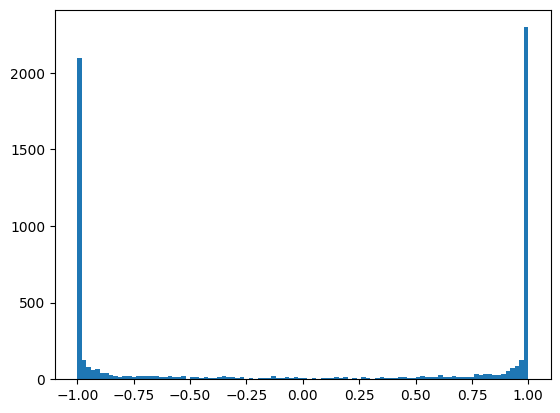

In [174]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden)
b1 = torch.randn(n_hidden)
w2 = torch.randn(n_hidden, 27)
b2 = torch.randn(27)
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000



idx = torch.randint(0, X_train.shape[0], (bs,))
x = X_train[idx]
y = Y_train[idx]
emb = C[x].view(x.shape[0], -1)
hpreact = emb @ w1 + b1
h = hpreact.tanh()
logits = h @ w2 + b2
loss = F.cross_entropy(logits, y)

plt.hist(h.view(-1).tolist(), 100)

loss

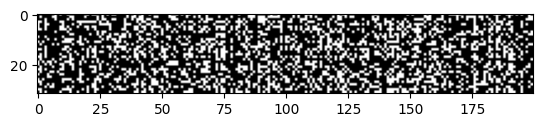

In [175]:
plt.imshow(h > 0.99, cmap='gray')

tensor(3.4792, grad_fn=<NllLossBackward0>)

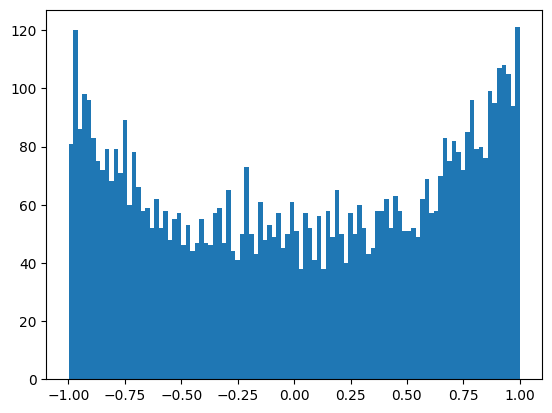

In [245]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5
b1 = torch.randn(n_hidden) * 0.01 # add some entropy before tanh
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5
b2 = torch.randn(27) * 0
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000



idx = torch.randint(0, X_train.shape[0], (bs,))
x = X_train[idx]
y = Y_train[idx]
emb = C[x].view(x.shape[0], -1)
hpreact = emb @ w1 + b1
h = hpreact.tanh()
logits = h @ w2 + b2
loss = F.cross_entropy(logits, y)

plt.hist(h.view(-1).tolist(), 100)

loss

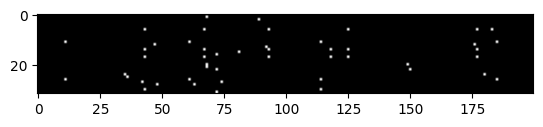

In [246]:
plt.imshow(h > 0.99, cmap='gray')

In [203]:
torch.manual_seed(42)

x = torch.randn(10000, 10)
w = torch.randn(10)

y = x @ w

x.std(), y.std()


(tensor(1.0059), tensor(3.2957))

In [204]:
torch.manual_seed(42)

x = torch.randn(10000, 10)
w = torch.randn(10) * 10 ** -0.5

y = x @ w

x.std(), y.std()


(tensor(1.0059), tensor(1.0422))

# kaiming init

In [218]:
torch.manual_seed(45)

x = torch.randn(100000)
y = x.tanh()
z = y * (5/3)
x.std(), y.std(), z.std()


(tensor(0.9977), tensor(0.6275), tensor(1.0458))

In [238]:
torch.manual_seed(451)

x = torch.randn(10000, 100)
w = torch.randn(100) * 100 ** -0.5 * (5/3)

y = (x @ w).tanh()

x.std(), y.std()


(tensor(0.9996), tensor(0.7318))

In [232]:
torch.manual_seed(42)
C = torch.randn(27, n_embd) * (n_embd) ** -0.5
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5

torch.Size([10000])

In [247]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5
b1 = torch.randn(n_hidden) * 0.01 # add some entropy before tanh
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5 * (5/3)
b2 = torch.randn(27) * 0
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.7981131076812744, val loss: 3.810770273208618
step: 5000, train loss: 2.4495651721954346, val loss: 2.322173595428467
step: 10000, train loss: 2.1329362392425537, val loss: 2.2771947383880615
step: 15000, train loss: 2.4378445148468018, val loss: 2.2617921829223633
step: 20000, train loss: 2.248011589050293, val loss: 2.2326605319976807
step: 25000, train loss: 2.4755475521087646, val loss: 2.2413690090179443
step: 30000, train loss: 2.097339630126953, val loss: 2.2135913372039795
step: 35000, train loss: 2.492683172225952, val loss: 2.2257628440856934
step: 40000, train loss: 1.9426915645599365, val loss: 2.2160024642944336
step: 45000, train loss: 1.836641788482666, val loss: 2.2106287479400635
step: 50000, train loss: 2.189366340637207, val loss: 2.215163469314575
step: 55000, train loss: 1.9834315776824951, val loss: 2.19856595993042
step: 60000, train loss: 2.7214760780334473, val loss: 2.2123913764953613
step: 65000, train loss: 2.2884953022003174, val loss

In [248]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.1105)

# zero init
sometimes it damage the exploration of weight space during optimization

In [251]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd) * 0
w1 = torch.randn(n_embd * 3, n_hidden) * 0
b1 = torch.randn(n_hidden) * 0
w2 = torch.randn(n_hidden, 27) * 0
b2 = torch.randn(27) * 0
params = [C, w1, b1, w2, b2]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.295837163925171, val loss: 3.295836925506592
step: 5000, train loss: 2.837958812713623, val loss: 2.8179070949554443
step: 10000, train loss: 2.954922914505005, val loss: 2.819114923477173
step: 15000, train loss: 3.103015184402466, val loss: 2.8183705806732178
step: 20000, train loss: 2.845045566558838, val loss: 2.8185794353485107
step: 25000, train loss: 2.860874652862549, val loss: 2.8180415630340576
step: 30000, train loss: 2.872079849243164, val loss: 2.8178398609161377
step: 35000, train loss: 2.6541695594787598, val loss: 2.818268060684204
step: 40000, train loss: 2.803844451904297, val loss: 2.8181488513946533
step: 45000, train loss: 2.8868420124053955, val loss: 2.818114995956421
step: 50000, train loss: 2.696639060974121, val loss: 2.81795072555542
step: 55000, train loss: 2.774677038192749, val loss: 2.8182125091552734
step: 60000, train loss: 3.103708028793335, val loss: 2.817776679992676
step: 65000, train loss: 2.6902365684509277, val loss: 2.8180

the loss can't be reduced!

In [252]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    logits = torch.tanh(emb @ w1 + b1) @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.8157)

### zero init cause highly correlated weight

In [344]:
torch.manual_seed(42)
a = torch.zeros(10, requires_grad=True)
x = torch.randn(10)
y = torch.randn(1)
eta = 0.1

A = []
for _ in range(5):
    loss = 1/2 * (a @ x - y) ** 2
    loss.backward()
    a.data -= eta * a.grad
    a.grad = None
    A.append(a.data.clone())

A = torch.stack(A)
print(A / (x.view(1, -1) * y * eta))


tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.2899, 1.2899, 1.2899, 1.2899, 1.2899, 1.2899, 1.2899, 1.2899, 1.2899,
         1.2899],
        [1.3739, 1.3739, 1.3739, 1.3739, 1.3739, 1.3739, 1.3739, 1.3739, 1.3739,
         1.3739],
        [1.3983, 1.3983, 1.3983, 1.3983, 1.3983, 1.3983, 1.3983, 1.3983, 1.3983,
         1.3983],
        [1.4053, 1.4053, 1.4053, 1.4053, 1.4053, 1.4053, 1.4053, 1.4053, 1.4053,
         1.4053]])


but random init is better

In [346]:
torch.manual_seed(42)
a = torch.randn(10, requires_grad=True)
x = torch.randn(10)
y = torch.randn(1)
eta = 0.1

A = []
for _ in range(5):
    loss = 1/2 * (a @ x - y) ** 2
    loss.backward()
    a.data -= eta * a.grad
    a.grad = None
    A.append(a.data.clone())

A = torch.stack(A)
print(A / (x.view(1, -1) * y * eta))


tensor([[ 3.4864e+00,  9.3830e-03,  3.9400e-01, -2.1751e+00,  7.2272e+00,
         -2.6053e+00,  1.1181e+01, -6.9395e+00, -5.6242e+00, -3.8006e+00],
        [ 3.5437e+00,  6.6683e-02,  4.5130e-01, -2.1178e+00,  7.2845e+00,
         -2.5480e+00,  1.1238e+01, -6.8822e+00, -5.5669e+00, -3.7433e+00],
        [ 3.5409e+00,  6.3871e-02,  4.4849e-01, -2.1206e+00,  7.2817e+00,
         -2.5508e+00,  1.1236e+01, -6.8850e+00, -5.5697e+00, -3.7461e+00],
        [ 3.5411e+00,  6.4009e-02,  4.4863e-01, -2.1204e+00,  7.2818e+00,
         -2.5507e+00,  1.1236e+01, -6.8849e+00, -5.5695e+00, -3.7460e+00],
        [ 3.5411e+00,  6.4002e-02,  4.4862e-01, -2.1205e+00,  7.2818e+00,
         -2.5507e+00,  1.1236e+01, -6.8849e+00, -5.5695e+00, -3.7460e+00]])


## some notes
- large value through tanh causes gradient vanishing
- dead neurons: during the whole training process, the neuron's grad is always 0, making backward pass unable to update the weight before this neuron
  - this may be due to bad initialization
  - or large lr forcing the weight out of data manifold, after that the neuron's grad is always 0

# batch normalization

In [371]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5
# b1 = torch.randn(n_hidden) * 0.01  # this is cancel out by batch normalization
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5 * (5/3)
b2 = torch.randn(27) * 0
bnw = torch.ones(n_hidden)
bnb = torch.zeros(n_hidden)
params = [C, w1, w2, b2, bnw, bnb]
for p in params:
    p.requires_grad = True

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    hpreact = emb @ w1
    hpreact = (hpreact - hpreact.mean(dim=0, keepdim=True)) / hpreact.std(dim=0, keepdim=True) * bnw + bnb
    h = hpreact.tanh()
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            hpreact = emb @ w1
            hpreact = (hpreact - hpreact.mean(dim=0, keepdim=True)) / hpreact.std(dim=0, keepdim=True) * bnw + bnb
            h = hpreact.tanh()
            logits = h @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.747368335723877, val loss: 3.9844541549682617
step: 5000, train loss: 2.5015511512756348, val loss: 2.326988697052002
step: 10000, train loss: 2.372178792953491, val loss: 2.271209955215454
step: 15000, train loss: 2.4223053455352783, val loss: 2.249488353729248
step: 20000, train loss: 2.008833408355713, val loss: 2.2394208908081055
step: 25000, train loss: 2.25154709815979, val loss: 2.2271664142608643
step: 30000, train loss: 2.091019868850708, val loss: 2.229412317276001
step: 35000, train loss: 2.235811471939087, val loss: 2.220167875289917
step: 40000, train loss: 2.358311891555786, val loss: 2.2133467197418213
step: 45000, train loss: 2.398972988128662, val loss: 2.200223445892334
step: 50000, train loss: 2.2789223194122314, val loss: 2.20524525642395
step: 55000, train loss: 2.4336771965026855, val loss: 2.199892520904541
step: 60000, train loss: 1.864798665046692, val loss: 2.209871292114258
step: 65000, train loss: 2.31721568107605, val loss: 2.18447566

In [372]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    hpreact = emb @ w1
    hpreact = (hpreact - hpreact.mean(dim=0, keepdim=True)) / hpreact.std(dim=0, keepdim=True) * bnw + bnb
    h = hpreact.tanh()
    logits = h @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.1145)

## test single example
need to estimate mean and std of the hidden states

In [373]:
n_embd = 10
n_hidden = 200

torch.manual_seed(42)
C = torch.randn(27, n_embd)
w1 = torch.randn(n_embd * 3, n_hidden) * (n_embd * 3) ** -0.5
w2 = torch.randn(n_hidden, 27) * (n_hidden) ** -0.5 * (5/3)
b2 = torch.randn(27) * 0
bnw = torch.ones(n_hidden)
bnb = torch.zeros(n_hidden)
params = [C, w1, w2, b2, bnw, bnb]
for p in params:
    p.requires_grad = True
bnmean_running = torch.zeros(n_hidden)
bnstd_running = torch.ones(n_hidden)

bs = 32
n_steps = 200000


for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x = X_train[idx]
    y = Y_train[idx]
    emb = C[x].view(x.shape[0], -1)
    hpreact = emb @ w1
    bnmeani = hpreact.mean(dim=0, keepdim=True)
    bnstdi = hpreact.std(dim=0, keepdim=True)
    hpreact = (hpreact - bnmeani) / bnstdi * bnw + bnb

    with torch.no_grad():
        bnmean_running = bnmean_running * 0.99 + bnmeani * 0.01
        bnstd_running = bnstd_running * 0.99 + bnstdi * 0.01

    h = hpreact.tanh()
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, y)
    if step % 5000 == 0:
        with torch.no_grad():
            emb = C[X_val].view(X_val.shape[0], -1)
            hpreact = emb @ w1
            hpreact = (hpreact - hpreact.mean(dim=0, keepdim=True)) / hpreact.std(dim=0, keepdim=True) * bnw + bnb
            h = hpreact.tanh()
            logits = h @ w2 + b2
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'step: {step}, train loss: {loss.item()}, val loss: {val_loss.item()}')
    loss.backward()
    lr = 0.1 if step < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad
        p.grad = None
    

step: 0, train loss: 3.747368335723877, val loss: 3.9844541549682617
step: 5000, train loss: 2.5015511512756348, val loss: 2.326988697052002
step: 10000, train loss: 2.372178792953491, val loss: 2.271209955215454
step: 15000, train loss: 2.4223053455352783, val loss: 2.249488353729248
step: 20000, train loss: 2.008833408355713, val loss: 2.2394208908081055
step: 25000, train loss: 2.25154709815979, val loss: 2.2271664142608643
step: 30000, train loss: 2.091019868850708, val loss: 2.229412317276001
step: 35000, train loss: 2.235811471939087, val loss: 2.220167875289917
step: 40000, train loss: 2.358311891555786, val loss: 2.2133467197418213
step: 45000, train loss: 2.398972988128662, val loss: 2.200223445892334
step: 50000, train loss: 2.2789223194122314, val loss: 2.20524525642395
step: 55000, train loss: 2.4336771965026855, val loss: 2.199892520904541
step: 60000, train loss: 1.864798665046692, val loss: 2.209871292114258
step: 65000, train loss: 2.31721568107605, val loss: 2.18447566

running mean and std are almost the same as the mean and std of the training data

In [374]:
with torch.no_grad():
    emb = C[X_train].view(X_train.shape[0], -1)
    hpreact = emb @ w1
    bnmean = hpreact.mean(dim=0, keepdim=True)
    bnstd = hpreact.std(dim=0, keepdim=True)


bnmean[0,:10], bnmean_running[0,:10], bnstd[0,:10], bnstd_running[0,:10]

(tensor([ 0.6718,  0.4164,  0.0921, -0.5415,  0.3795, -0.8223, -1.5762,  0.2370,
         -0.4165, -0.2239]),
 tensor([ 0.6803,  0.4131,  0.0650, -0.5341,  0.3491, -0.8315, -1.5521,  0.2396,
         -0.4252, -0.2152]),
 tensor([1.7298, 1.3654, 2.3272, 1.7531, 2.0221, 1.9044, 1.9937, 1.3250, 1.9456,
         1.7565]),
 tensor([1.7263, 1.3627, 2.2822, 1.7338, 1.9936, 1.8622, 1.9957, 1.3135, 1.9481,
         1.7128]))

In [375]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    hpreact = emb @ w1
    hpreact = (hpreact - hpreact.mean(dim=0, keepdim=True)) / hpreact.std(dim=0, keepdim=True) * bnw + bnb
    h = hpreact.tanh()
    logits = h @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss


tensor(2.1145)

In [376]:
with torch.no_grad():
    emb = C[X_test].view(X_test.shape[0], -1)
    hpreact = emb @ w1
    hpreact = (hpreact - bnmean_running) / bnstd_running * bnw + bnb
    h = hpreact.tanh()
    logits = h @ w2 + b2
    val_loss = F.cross_entropy(logits, Y_test)

val_loss


tensor(2.1147)

# pytorchify

In [1077]:
class Embedding:
    def __init__(self, num_classes, dim, generator=None):
        self.weight = torch.randn(num_classes, dim, requires_grad=True, generator=generator)
    
    def __call__(self, x):
        self.out = self.weight[x]
        return self.out
    
    def parameters(self):
        return [self.weight]

class Linear:
    def __init__(self, in_features, out_features, bias=True, generator=None):
        self.weight = torch.randn(in_features, out_features, requires_grad=True, generator=generator)
        self.bias = torch.zeros(out_features, requires_grad=True) if bias else None
        # initialization
        self.weight.data /= (self.weight.shape[0]) ** 0.5

    def __call__(self, x):
        out = x @ self.weight
        if self.bias is not None:
            out = out + self.bias
        self.out = out
        return self.out
    
    def parameters(self):
        params = [self.weight]
        if self.bias is not None:
            params.append(self.bias)
        return params

class BatchNorm1d:
    def __init__(self, in_features, eps=1e-5, momentum=0.001):
        self.weight = torch.ones(in_features, requires_grad=True)
        self.bias = torch.zeros(in_features, requires_grad=True)
        self.running_mean = torch.zeros(in_features)
        self.running_var = torch.ones(in_features)
        self.eps = eps
        self.momentum = momentum
        self._training = True # internal flag
    
    def __call__(self, x):
        if self._training:
            self.batch_mean = x.mean(dim=0, keepdim=True)
            self.batch_var = x.var(dim=0, keepdim=True)
            with torch.no_grad():
                self.running_mean = self.running_mean * (1 - self.momentum) + self.batch_mean * self.momentum
                self.running_var = self.running_var * (1 - self.momentum) + self.batch_var * self.momentum
        else:
            self.batch_mean = self.running_mean
            self.batch_var = self.running_var
        self.out = self.weight * (x - self.batch_mean) / (self.batch_var + self.eps).sqrt() + self.bias
        return self.out
    
    def parameters(self):
        return [self.weight, self.bias]

class Tanh:
    def __call__(self, x):
        self.out = x.tanh()
        return self.out
    
    def parameters(self):
        return []



In [1037]:
class Net:
    def __init__(self, vocab_size, block_size, n_embd, n_hidden, n_layer, generator=None):
        self.wte = Embedding(vocab_size, n_embd, generator=generator)
        self.layers = [
            Linear(n_embd * block_size, n_hidden, bias=False, generator=generator),
            BatchNorm1d(n_hidden),
            Tanh()
        ]
        for _ in range(n_layer-1):
            self.layers.extend([
                Linear(n_hidden, n_hidden, bias=False, generator=generator),
                BatchNorm1d(n_hidden),
                Tanh()
            ])
        self.layers.append(
            Linear(n_hidden, vocab_size, generator=generator)
        )
    
    def __call__(self, x):
        x = self.wte(x).view(x.shape[0], -1)
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for module in ([self.wte] + self.layers) for p in module.parameters()]

    def train(self):
        for module in self.layers:
            if isinstance(module, BatchNorm1d):
                module._training = True
    
    def eval(self):
        for module in self.layers:
            if isinstance(module, BatchNorm1d):
                module._training = False


In [1038]:
vocab_size = 27
block_size = 3
n_layer = 5
n_embd = 10
n_hidden = 200
g = torch.Generator().manual_seed(42)


model = Net(vocab_size, block_size, n_embd, n_hidden, n_layer, generator=g)
n_steps = 200000

torch.manual_seed(42)
model.train()
for step in range(n_steps):
    if step % 5000 == 0:
        model.eval()
        with torch.no_grad():
            logits = model(X_val)
            val_loss = F.cross_entropy(logits, Y_val)
            print(f'val loss: {val_loss.item()}')
        model.train()

    idx = torch.randint(0, X_train.shape[0], (bs,))
    x, y = X_train[idx], Y_train[idx]
    lr = 0.1 if step < 150000 else 0.01

    logits = model(x)
    loss = F.cross_entropy(logits, y)
    if step % 1000 == 0:
        print(f'step: {step}, train loss: {loss.item()}')
    for module in model.layers:
        module.out.retain_grad() # keep grad for intermediate variables

    loss.backward()
    for p in model.parameters():
        p.data -= lr * p.grad
        p.grad = None
    





val loss: 3.358299493789673
step: 0, train loss: 3.4689831733703613
step: 1000, train loss: 2.713491201400757
step: 2000, train loss: 2.659510850906372
step: 3000, train loss: 2.1688177585601807
step: 4000, train loss: 2.539963722229004
val loss: 2.3308722972869873
step: 5000, train loss: 2.221750259399414
step: 6000, train loss: 2.251497507095337
step: 7000, train loss: 2.2250332832336426
step: 8000, train loss: 2.640246629714966
step: 9000, train loss: 2.1898937225341797
val loss: 2.253150224685669
step: 10000, train loss: 2.372166633605957
step: 11000, train loss: 2.0467917919158936
step: 12000, train loss: 2.656024694442749
step: 13000, train loss: 2.176082134246826
step: 14000, train loss: 2.068925619125366
val loss: 2.2280051708221436
step: 15000, train loss: 2.4870002269744873
step: 16000, train loss: 2.236672878265381
step: 17000, train loss: 2.08332896232605
step: 18000, train loss: 2.295156955718994
step: 19000, train loss: 2.1594767570495605
val loss: 2.1968376636505127
step

In [1039]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    val_loss = F.cross_entropy(logits, Y_test)

val_loss

tensor(2.0784)

In [1040]:
g.manual_seed(42)
with torch.no_grad():
    for _ in range(10):
        idx = torch.zeros(1, block_size, dtype=torch.long)
        for _ in range(10):
            cond = idx[:, -block_size:]
            logit = model(cond)
            prob = logit.softmax(dim=-1)
            idx_next = torch.multinomial(prob, num_samples=1, generator=g)
            idx = torch.cat([idx, idx_next], dim=1)
            if idx_next.item() == 0:
                break
        print(''.join([itos[i] for i in idx[0].tolist()]))



...anuellavon
...semarian.
...dan.
...shan.
...silayler.
...kemah.
...lucin.
...epiachaden
...james.
...kend.


# visualize the hidden states
test the effect of gain(in kaiming init) on the hidden states for forward and backward pass
- for forward pass, effect = $f(\text{gain}^l)$
- for backward pass, effect = $f(\text{gain}^{n_{\text{layers}}-l})$

if activation function is tanh, $f(5/3)\approx 1$


## without batch normalization

train loss: 3.6621975898742676
[out] layer  1     Tanh:  mean 0.0278, std 0.7739 saturated 13.05%
[out] layer  3     Tanh:  mean -0.0002, std 0.6948 saturated 5.25%
[out] layer  5     Tanh:  mean -0.0005, std 0.6642 saturated 3.02%
[out] layer  7     Tanh:  mean 0.0161, std 0.6514 saturated 2.84%
[out] layer  9     Tanh:  mean -0.0070, std 0.6523 saturated 2.80%


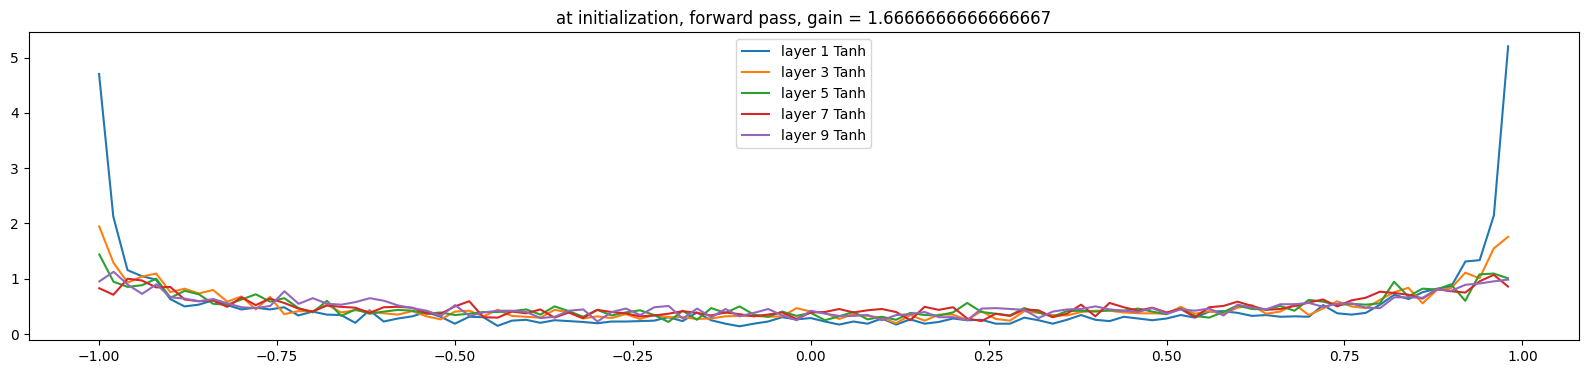

[out.grad] layer  1     Tanh:  mean -0.0000, std 0.004861, maxv 0.0252
[out.grad] layer  3     Tanh:  mean -0.0001, std 0.004674, maxv 0.0188
[out.grad] layer  5     Tanh:  mean -0.0000, std 0.004311, maxv 0.0164
[out.grad] layer  7     Tanh:  mean -0.0001, std 0.004024, maxv 0.0172
[out.grad] layer  9     Tanh:  mean 0.0001, std 0.003867, maxv 0.0167


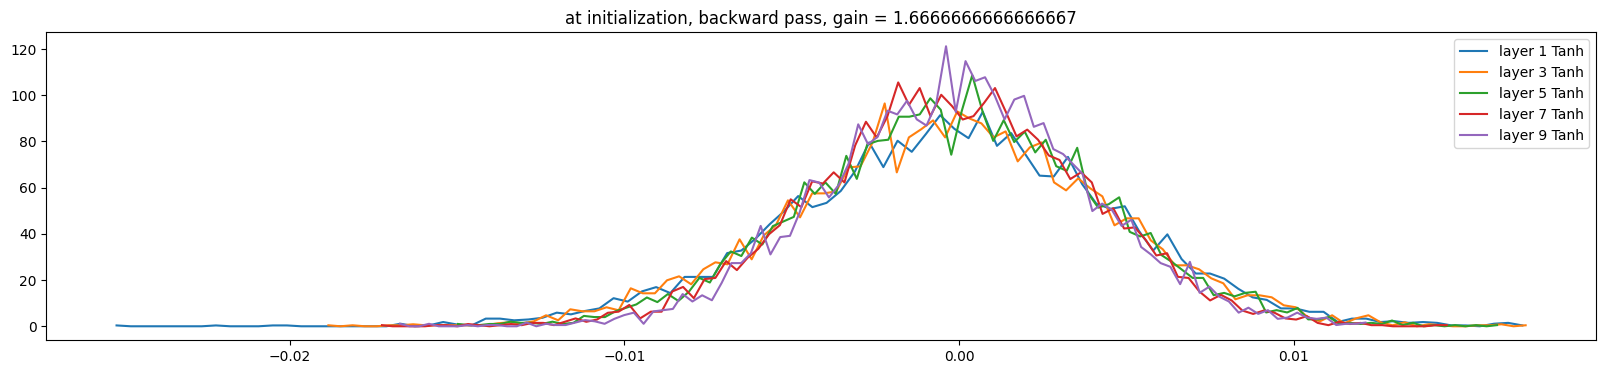

In [679]:
gain = 5 / 3

g.manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]
for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, forward pass, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, backward pass, gain = {gain}')
plt.show()


for backward, each layer's grad is roughly the same

### If we take too large or small gain, the grad will vanish

It's easy to see that small gain cause grad vanish.

For large gain, tanh(tanh(x) * gain) will approximate 1 or -1, where the grad is near 0.


train loss: 28.87566566467285
[out] layer  1     Tanh:  mean 0.0308, std 0.9733 saturated 46.27%
[out] layer  3     Tanh:  mean -0.0010, std 0.9734 saturated 44.45%
[out] layer  5     Tanh:  mean 0.0146, std 0.9736 saturated 45.42%
[out] layer  7     Tanh:  mean 0.0109, std 0.9711 saturated 44.75%
[out] layer  9     Tanh:  mean -0.0181, std 0.9695 saturated 43.44%


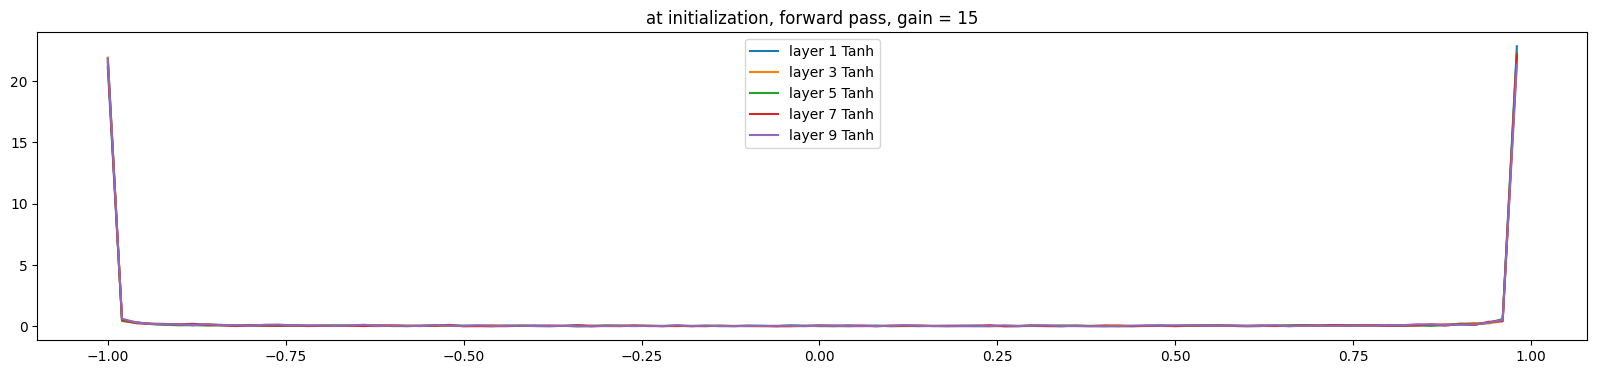

[out.grad] layer  1     Tanh:  mean -0.0189, std 3.555861, maxv 33.2876
[out.grad] layer  3     Tanh:  mean -0.0353, std 1.249114, maxv 7.3009
[out.grad] layer  5     Tanh:  mean 0.0038, std 0.442402, maxv 2.9564
[out.grad] layer  7     Tanh:  mean 0.0015, std 0.143034, maxv 0.7699
[out.grad] layer  9     Tanh:  mean -0.0005, std 0.046028, maxv 0.2130


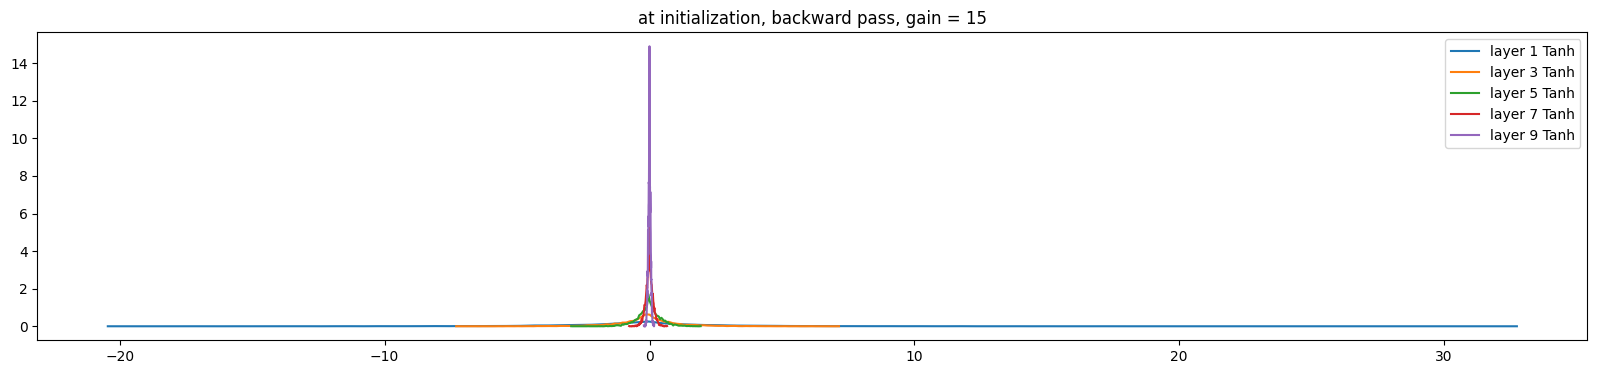

In [1026]:
gain = 15

g.manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]
for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, forward pass, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, backward pass, gain = {gain}')
plt.show()


train loss: 3.295224189758301
[out] layer  1     Tanh:  mean 0.0163, std 0.4410 saturated 0.00%
[out] layer  3     Tanh:  mean -0.0003, std 0.2062 saturated 0.00%
[out] layer  5     Tanh:  mean -0.0005, std 0.1017 saturated 0.00%
[out] layer  7     Tanh:  mean -0.0001, std 0.0499 saturated 0.00%
[out] layer  9     Tanh:  mean 0.0004, std 0.0249 saturated 0.00%


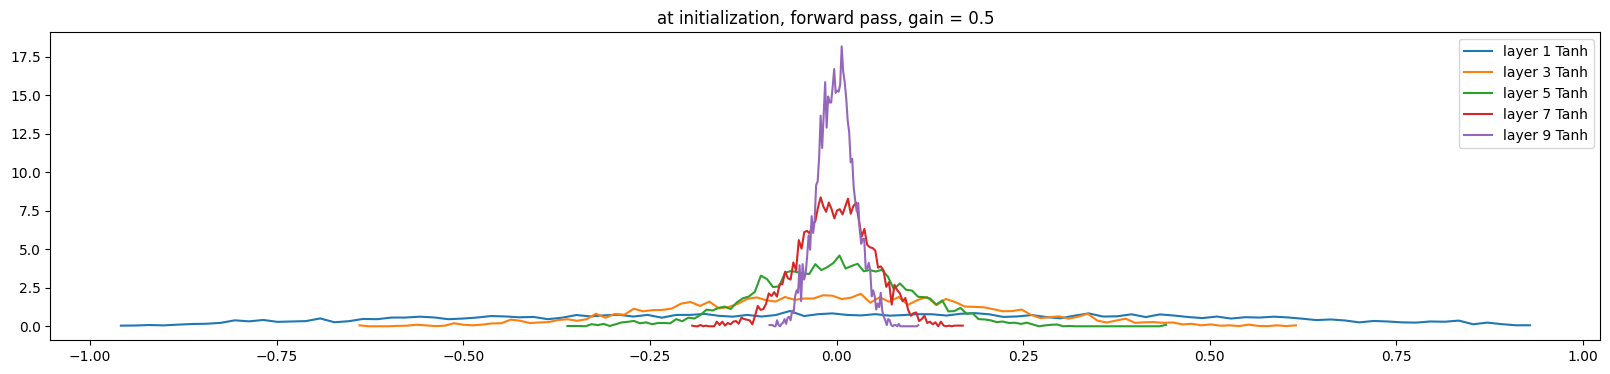

[out.grad] layer  1     Tanh:  mean 0.0000, std 0.000063, maxv 0.0002
[out.grad] layer  3     Tanh:  mean -0.0000, std 0.000133, maxv 0.0005
[out.grad] layer  5     Tanh:  mean 0.0000, std 0.000268, maxv 0.0011
[out.grad] layer  7     Tanh:  mean -0.0000, std 0.000545, maxv 0.0024
[out.grad] layer  9     Tanh:  mean 0.0000, std 0.001130, maxv 0.0051


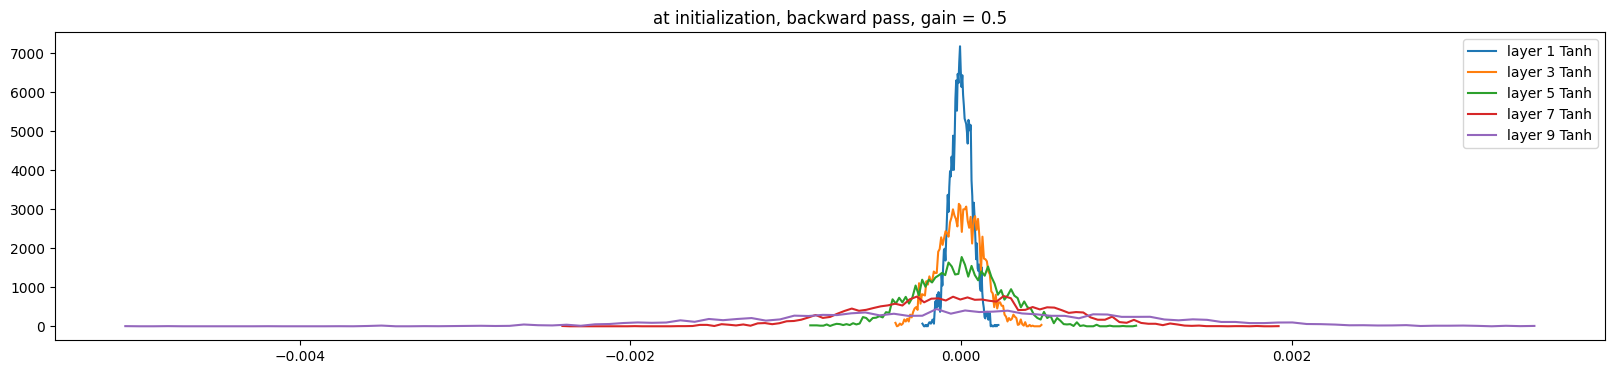

In [681]:
gain = 0.5

g.manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]
for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, forward pass, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, backward pass, gain = {gain}')
plt.show()


even for gain=1, tanh activation make gradient shrinkage

train loss: 3.30757737159729
[out] layer  1     Tanh:  mean 0.0236, std 0.6491 saturated 3.39%
[out] layer  3     Tanh:  mean -0.0011, std 0.4914 saturated 0.02%
[out] layer  5     Tanh:  mean -0.0011, std 0.4058 saturated 0.00%
[out] layer  7     Tanh:  mean 0.0053, std 0.3508 saturated 0.00%
[out] layer  9     Tanh:  mean 0.0008, std 0.3168 saturated 0.00%


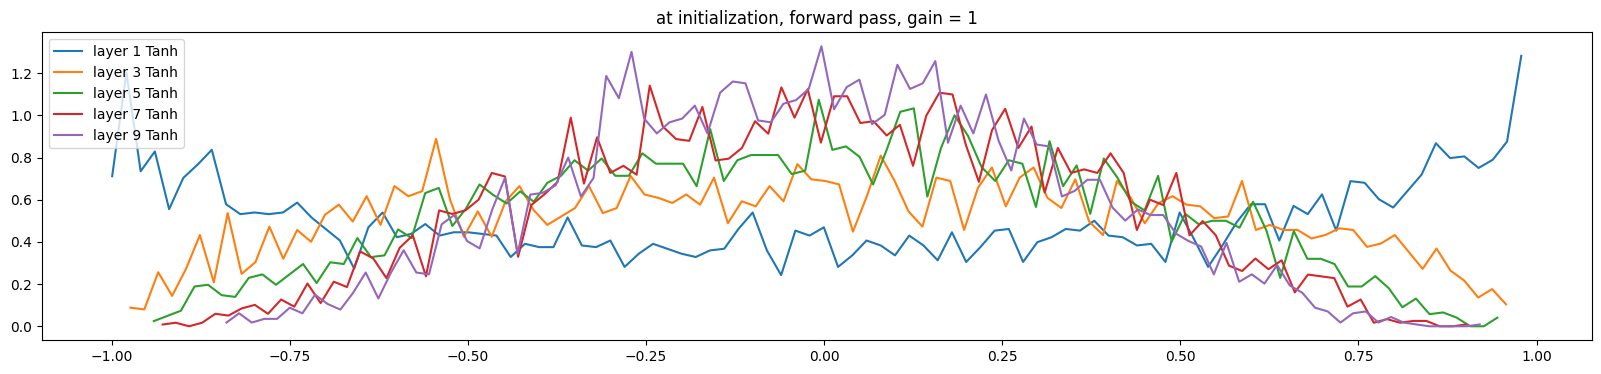

[out.grad] layer  1     Tanh:  mean 0.0000, std 0.001180, maxv 0.0048
[out.grad] layer  3     Tanh:  mean -0.0000, std 0.001496, maxv 0.0054
[out.grad] layer  5     Tanh:  mean 0.0000, std 0.001736, maxv 0.0071
[out.grad] layer  7     Tanh:  mean -0.0000, std 0.001982, maxv 0.0087
[out.grad] layer  9     Tanh:  mean 0.0000, std 0.002261, maxv 0.0103


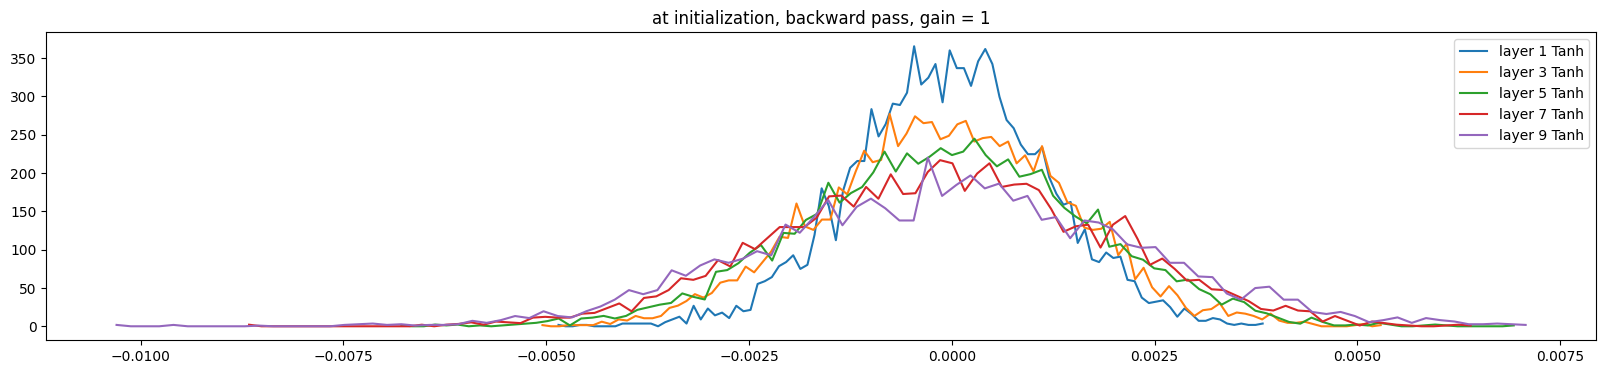

In [682]:
gain = 1

g.manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]
for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, forward pass, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, backward pass, gain = {gain}')
plt.show()


### without tanh, the equibrium is gain = 1

Because identity function doesn't do any distortion of distribution.

train loss: 3.812340259552002
[out] layer  0   Linear:  mean 0.0411, std 1.0890 saturated 19.39%
[out] layer  1   Linear:  mean -0.0013, std 1.0558 saturated 16.86%
[out] layer  2   Linear:  mean -0.0047, std 1.0657 saturated 17.13%
[out] layer  3   Linear:  mean -0.0113, std 1.0504 saturated 16.45%
[out] layer  4   Linear:  mean 0.0225, std 1.0483 saturated 17.61%


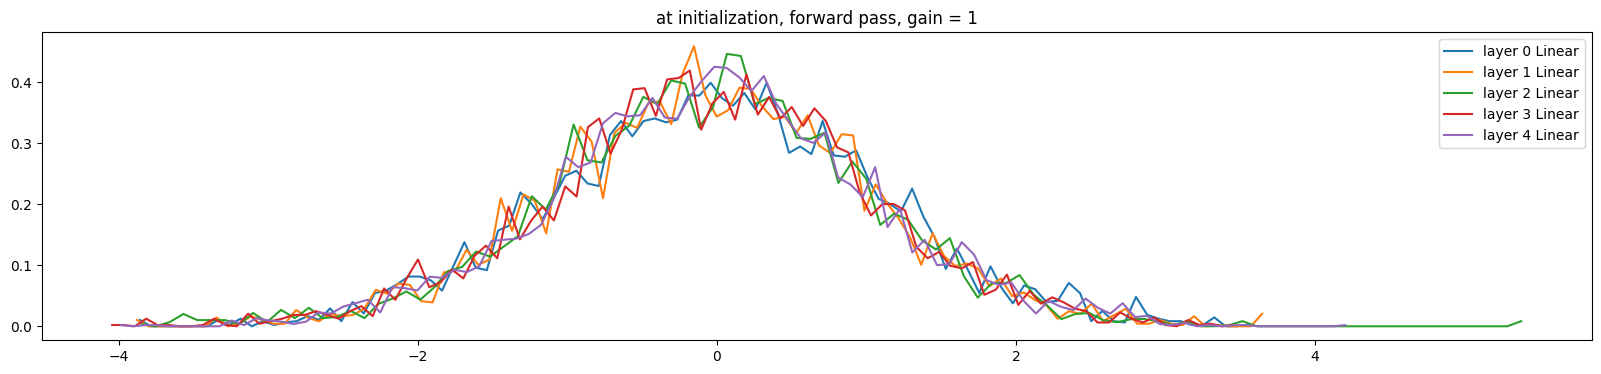

[out.grad] layer  0   Linear:  mean 0.0000, std 0.002235, maxv 0.0106
[out.grad] layer  1   Linear:  mean -0.0000, std 0.002234, maxv 0.0076
[out.grad] layer  2   Linear:  mean -0.0000, std 0.002225, maxv 0.0084
[out.grad] layer  3   Linear:  mean -0.0000, std 0.002256, maxv 0.0108
[out.grad] layer  4   Linear:  mean 0.0001, std 0.002325, maxv 0.0109


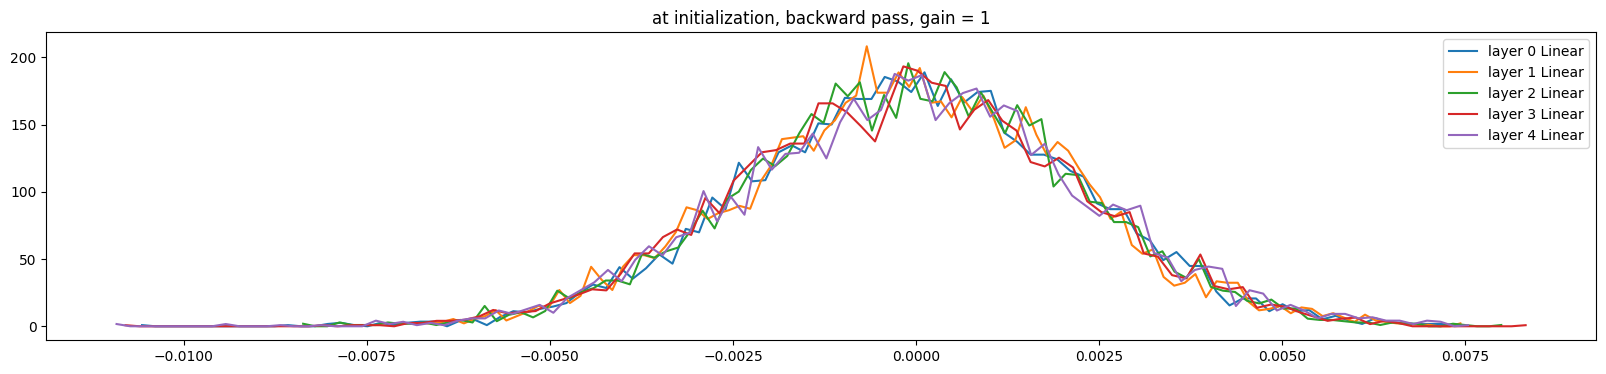

In [ ]:
gain = 1

g.manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]
for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Linear):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, forward pass, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Linear):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, backward pass, gain = {gain}')
plt.show()


note that we don't consider grad of last linear layer

In [ ]:
for i, layer in enumerate(layers):
    if isinstance(layer, Linear):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)

[out.grad] layer  0   Linear:  mean 0.0000, std 0.002235, maxv 0.0106
[out.grad] layer  1   Linear:  mean -0.0000, std 0.002234, maxv 0.0076
[out.grad] layer  2   Linear:  mean -0.0000, std 0.002225, maxv 0.0084
[out.grad] layer  3   Linear:  mean -0.0000, std 0.002256, maxv 0.0108
[out.grad] layer  4   Linear:  mean 0.0001, std 0.002325, maxv 0.0109
[out.grad] layer  5   Linear:  mean -0.0000, std 0.006076, maxv 0.0312


last layer has different out size, which cause different scale of grad

$$
\nabla_{\mathbf{h}_{l-1}} \mathcal{L} = W_l \cdot \nabla_{\mathbf{h}_l} \mathcal{L}
$$

in our case, $W_l\in\mathbb{R}^{200\times 27}$.


In [ ]:
layers[-2].out.grad.std() / layers[-1].out.grad.std()

tensor(0.3827)

In [ ]:
(27/200)**0.5

0.3674234614174767

other gain values are bad

train loss: 45.720096588134766
[out] layer  0   Linear:  mean 0.0685, std 1.8150 saturated 30.55%
[out] layer  1   Linear:  mean -0.0035, std 2.9329 saturated 36.91%
[out] layer  2   Linear:  mean -0.0217, std 4.9337 saturated 41.92%
[out] layer  3   Linear:  mean -0.0872, std 8.1052 saturated 45.12%
[out] layer  4   Linear:  mean 0.2893, std 13.4813 saturated 47.94%


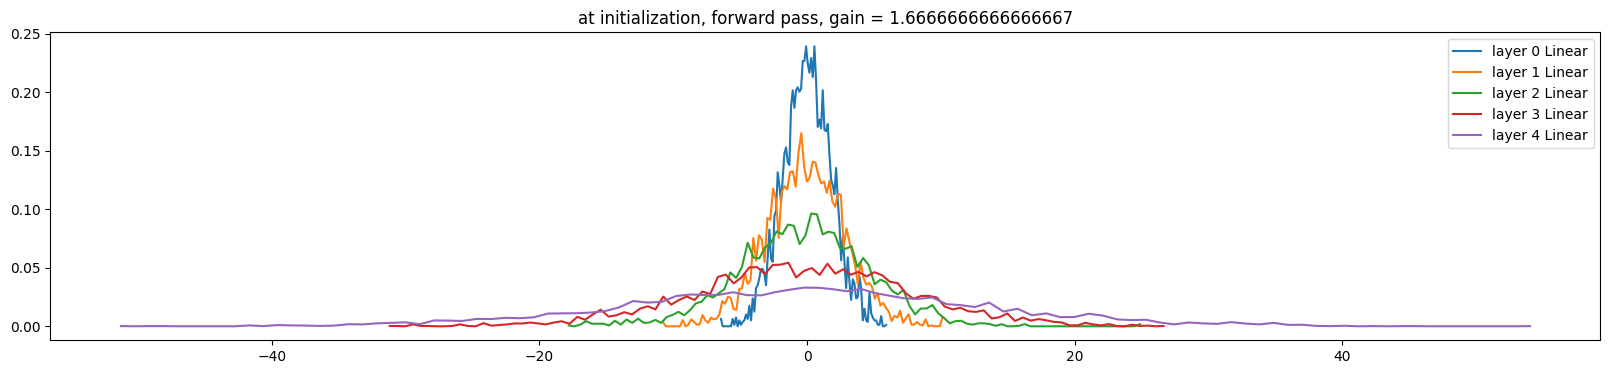

[out.grad] layer  0   Linear:  mean 0.0008, std 0.038568, maxv 0.1456
[out.grad] layer  1   Linear:  mean -0.0001, std 0.022754, maxv 0.0978
[out.grad] layer  2   Linear:  mean -0.0001, std 0.013746, maxv 0.0543
[out.grad] layer  3   Linear:  mean -0.0002, std 0.008307, maxv 0.0321
[out.grad] layer  4   Linear:  mean 0.0001, std 0.005157, maxv 0.0209


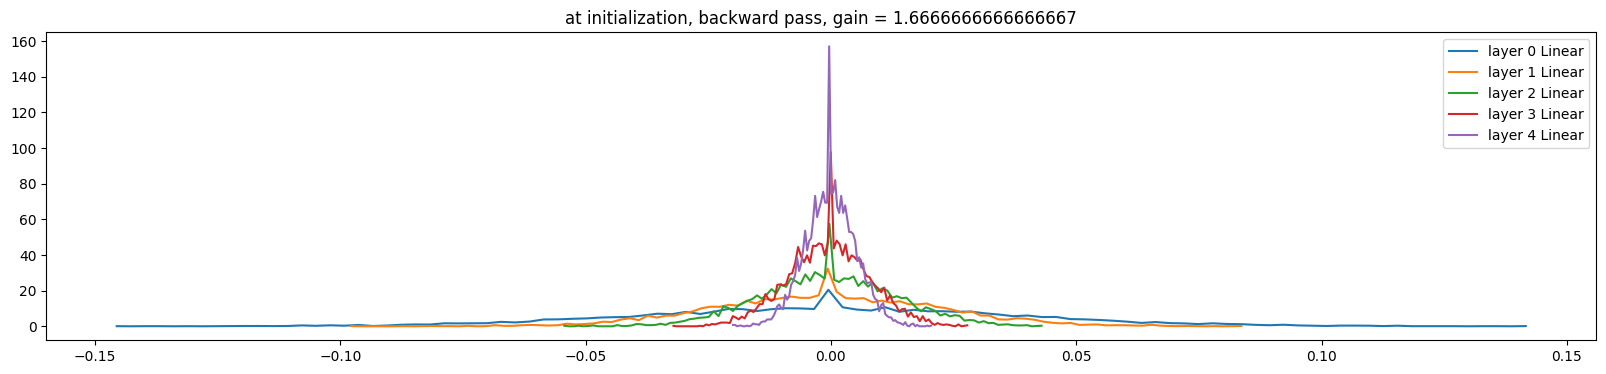

In [ ]:
gain = 5 / 3

g.manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, n_hidden, generator=g), #Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]
for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Linear):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, forward pass, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Linear):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, backward pass, gain = {gain}')
plt.show()


### why 5/3 for tanh?

assume $x\sim\mathcal{N}(0, 1)$, let $t(x) = \tanh(x)$, $o(x) = \gamma\cdot t(x)$. It's easy to see that $E[o(x)] = 0$.

Tanh compress the distribution of $x$ to $[-1, 1]$, which reduces the variance of data. To recover the variance, we further need the scale factor $\gamma$ satisfy:

$$
\text{Var}[o(x)] = \gamma^2 \cdot E[t(x)^2] \approx 1
$$

Since $E[t(x)^2]\approx 0.39$, the simplest fraction number that satisfies the above two equations is $\frac{5}{3}$.



In [992]:
z = torch.randn(100000000)
tz = z.tanh()
inv_std = 1 / tz.std()
inv_std

tensor(1.5925)

In [993]:
inv_std - 3/2, inv_std - 5/3, inv_std - 7/4, inv_std - 8/5

(tensor(0.0925), tensor(-0.0742), tensor(-0.1575), tensor(-0.0075))

This $\gamma$ also has another good property:

$$
E[\frac{do}{dx}] = \gamma \cdot E[\frac{dt}{dx}] = \gamma (1 - E[t(x)^2])\approx 1
$$

By chain rule, at initial stage, the gradient passing through each tanh layer is stable.

$$
L(x) = f_1(o(f_2(o(\cdots(f_{L-1}(o(f_L(x))))))))
$$

$$
\frac{dL}{dx} = \frac{dL}{df_L} \cdot \frac{df_L}{do} \cdot \frac{do}{df_{L-1}} \cdot \frac{df_{L-1}}{do} \cdots \frac{do}{df_2} \cdot \frac{df_2}{do} \cdot \frac{do}{df_1} \cdot \frac{df_1}{dx} \approx  \frac{dL}{df_L} \cdot \frac{df_L}{do} \cdot 1 \cdot \frac{df_{L-1}}{do} \cdots 1 \cdot \frac{df_2}{do} \cdot 1 \cdot \frac{df_1}{dx}
$$


This property is because value of $\text{Var}[t(x)]$ is good.


In [994]:
alpha = tz.data.var()
gamma = 1 / alpha ** 0.5
gamma * (1 - alpha)  # approx 1

tensor(0.9645)

In [991]:
torch.manual_seed(42)
a = torch.randn(10000000, requires_grad=True)
t = a.tanh()
t.sum().backward()
# grad of a_i is 1 - (t_i^2))

print('forward')
print(f'std    t: {t.data.std():.4f}   5/3 * t: {t.data.std() * 5/3:.4f}')

print('backward')
print(f'mean:   dt/da {a.grad.mean():.4f}   5/3 * dt/da {a.grad.mean() * 5/3:.4f}')

forward
std    t: 0.6279   5/3 * t: 1.0465
backward
mean:   dt/da 0.6058   5/3 * dt/da 1.0096


Since chain rule is product of grads, if grads are too small, the grad will vanish.

In [1027]:
torch.manual_seed(1337)
z = torch.randn(1000000, requires_grad=True)
tz = z.tanh() * 5/3
for _ in range(20):
    tz = tz.tanh() * 5/3

tz.sum().backward()
print(z.grad.mean()) # approx 1

torch.manual_seed(1337)
z = torch.randn(1000000, requires_grad=True)
tz = z.tanh() * (1 / (1 - 0.39))  # exact value
for _ in range(20):
    tz = tz.tanh() * (1 / (1 - 0.39))

tz.sum().backward()
print(z.grad.mean()) # approx 1

torch.manual_seed(1337)
z = torch.randn(1000000, requires_grad=True)
tz = z.tanh()
for _ in range(20):
    tz = tz.tanh()

tz.sum().backward()
print(z.grad.mean()) # grad vanishes

torch.manual_seed(1337)
z = torch.randn(1000000, requires_grad=True)
tz = z.tanh() * 5
for _ in range(20):
    tz = tz.tanh() * 5

tz.sum().backward()
print(z.grad.mean()) # grad vanishes



tensor(1.0406)
tensor(1.0488)
tensor(0.1990)
tensor(4.1818e-36)


however, note that it doesn't hold for much deeper layers. It's more likely to have many small number if the product of grads, which make grad vanish.


In [977]:
torch.manual_seed(1337)
z = torch.randn(1000000, requires_grad=True)
tz = z.tanh() * 5/3
for _ in range(30):
    tz = tz.tanh() * 5/3

tz.sum().backward()
print(z.grad.mean())

tensor(0.0026)


Using gain factor to make the grad apprximate 1 avoid grad vanishing or explosion to some extent. But it's not a good solution for deep networks. 

However, this may inspire subsequent work, ResNet.



### Grad data ratio
Though gain=5/3 makes intermediate activation and grad in tanh layer stable, the scale of grad of linear layer is non-uniform.

train loss: 3.6621975898742676
[out] layer  1     Tanh:  mean 0.0278, std 0.7739 saturated 13.05%
[out] layer  3     Tanh:  mean -0.0002, std 0.6948 saturated 5.25%
[out] layer  5     Tanh:  mean -0.0005, std 0.6642 saturated 3.02%
[out] layer  7     Tanh:  mean 0.0161, std 0.6514 saturated 2.84%
[out] layer  9     Tanh:  mean -0.0070, std 0.6523 saturated 2.80%


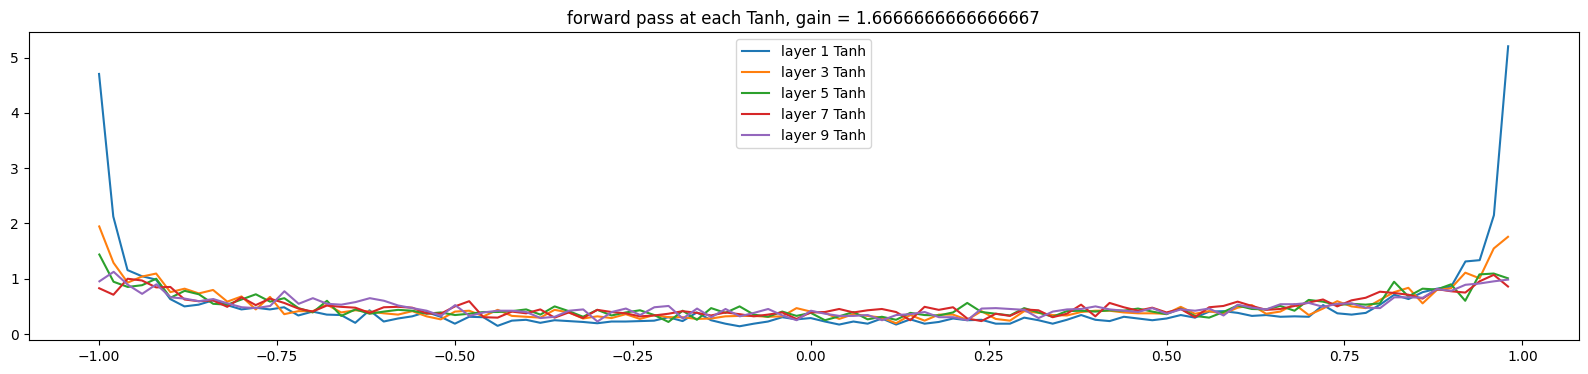

[out.grad] layer  1     Tanh:  mean -0.0000, std 0.004861, maxv 0.0252
[out.grad] layer  3     Tanh:  mean -0.0001, std 0.004674, maxv 0.0188
[out.grad] layer  5     Tanh:  mean -0.0000, std 0.004311, maxv 0.0164
[out.grad] layer  7     Tanh:  mean -0.0001, std 0.004024, maxv 0.0172
[out.grad] layer  9     Tanh:  mean 0.0001, std 0.003867, maxv 0.0167


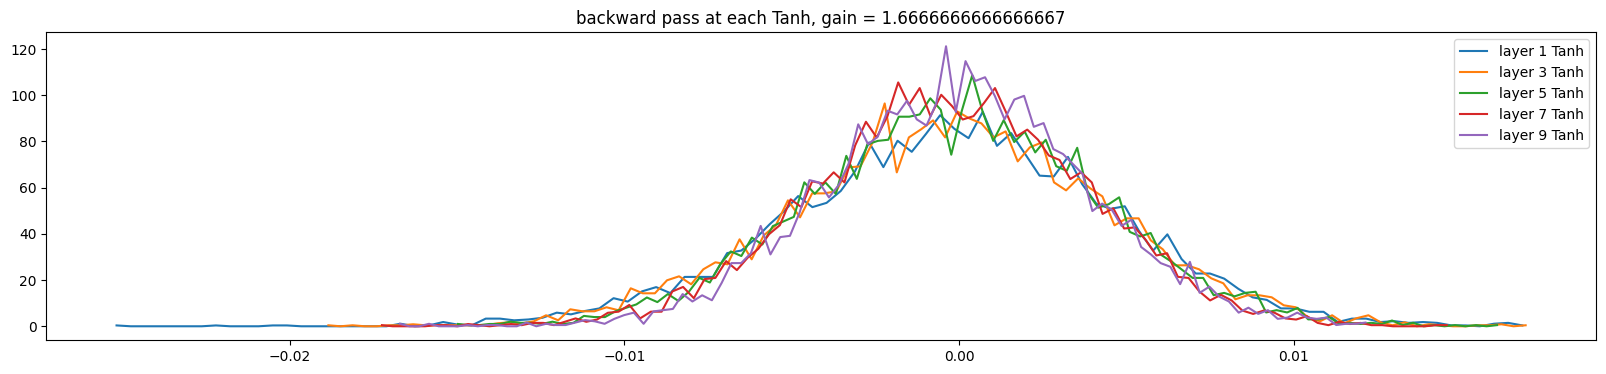

[p.grad] param  0 size torch.Size([27, 10]):  mean -0.0027, std 0.021015, grad:data 0.0210
[p.grad] param  1 size torch.Size([30, 200]):  mean -0.0002, std 0.016710, grad:data 0.0550
[p.grad] param  3 size torch.Size([200, 200]):  mean -0.0001, std 0.013843, grad:data 0.1167
[p.grad] param  5 size torch.Size([200, 200]):  mean 0.0000, std 0.012267, grad:data 0.1036
[p.grad] param  7 size torch.Size([200, 200]):  mean -0.0001, std 0.011407, grad:data 0.0965
[p.grad] param  9 size torch.Size([200, 200]):  mean -0.0000, std 0.010715, grad:data 0.0909
[p.grad] param 11 size torch.Size([200, 27]):  mean -0.0000, std 0.026368, grad:data 0.2176


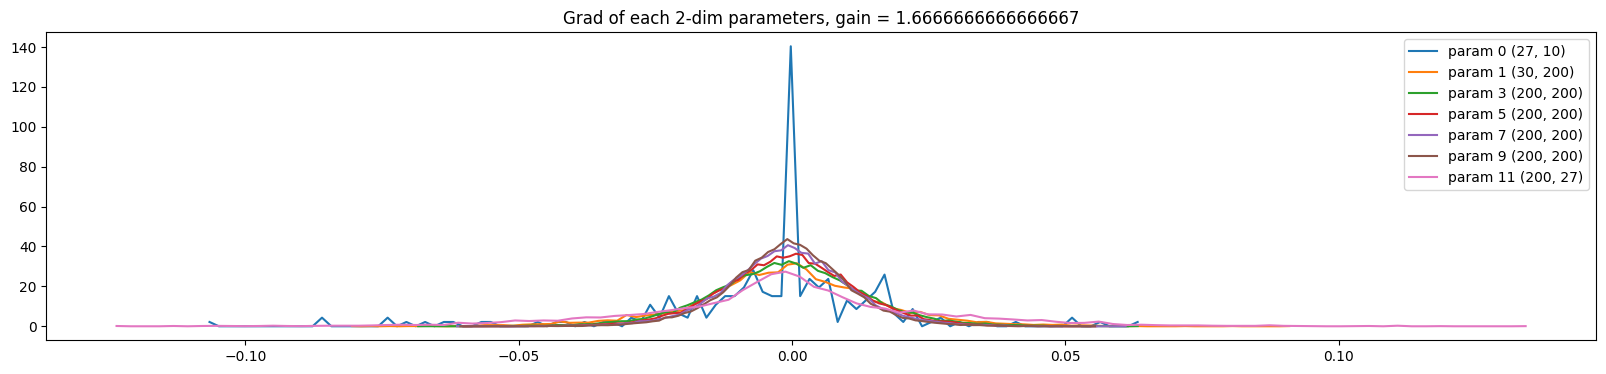

In [1070]:
gain = 5 / 3

g = torch.Generator().manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]

params = C.parameters() + [p for module in layers for p in module.parameters()]

for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'forward pass at each Tanh, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'backward pass at each Tanh, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, p in enumerate(params):
    if p.dim() == 2:
        gd = p.grad
        print(f'[p.grad] param {i:2d} size {p.shape}:  mean {gd.mean():.4f}, std {gd.std():.6f}, grad:data {gd.std() / p.std():.4f}')
        hist, bin_edges = torch.histogram(gd, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'param {i} {tuple(p.shape)}')

plt.legend()
plt.title(f'Grad of each 2-dim parameters, gain = {gain}')
plt.show()




### Update data ratio
Update = lr * grad, use update data ratio to check efficiency of training.
- 1e-3 is a empirical threshold, good update data ratio should be roughly 1e-3. Smaller ratio means lr is small and training is slow. Bigger ratio means lr is large and training is unstable.
- Ratio of different layers should be similar



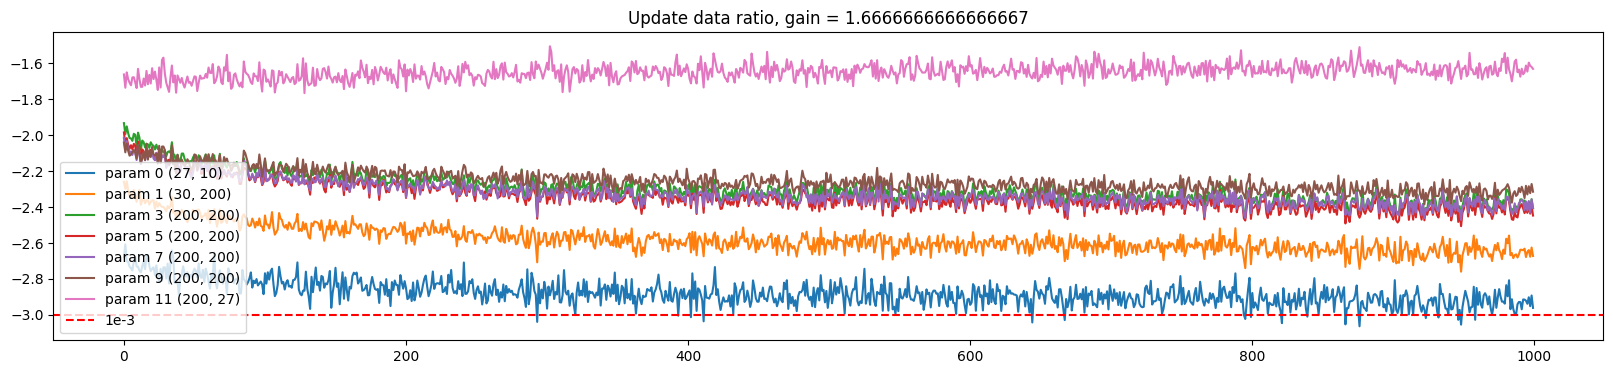

In [1079]:
gain = 5 / 3


g = torch.Generator().manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]

params = C.parameters() + [p for module in layers for p in module.parameters()]

for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

uds = {i: [] for i, p in enumerate(params) if p.ndim == 2}
n_steps = 1000
lr = 0.1
torch.manual_seed(42)
for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x, y = X_train[idx], Y_train[idx]


    h = C(x).view(x.shape[0], -1)
    for layer in layers:
        h = layer(h)

    loss = F.cross_entropy(h, y)
    loss.backward()

    # log update
    for i, p in enumerate(params):
        if p.ndim == 2:
            ud = lr * p.grad.std() / p.data.std()
            uds[i].append(ud.log10())

    for p in params:
        p.data -= lr * p.grad
        p.grad = None


plt.figure(figsize=(20, 4))
for i, ud in uds.items():
    plt.plot(ud, label=f'param {i} {tuple(params[i].shape)}')
plt.axhline(-3, color='red', linestyle='--', label='1e-3')  # 1e-3 is a good threshold
plt.legend()
plt.title(f'Update data ratio, gain = {gain}')
plt.show()




### Less confident for probability at initial stage
The scale of last layer need to be smaller. Now the ratios are better.

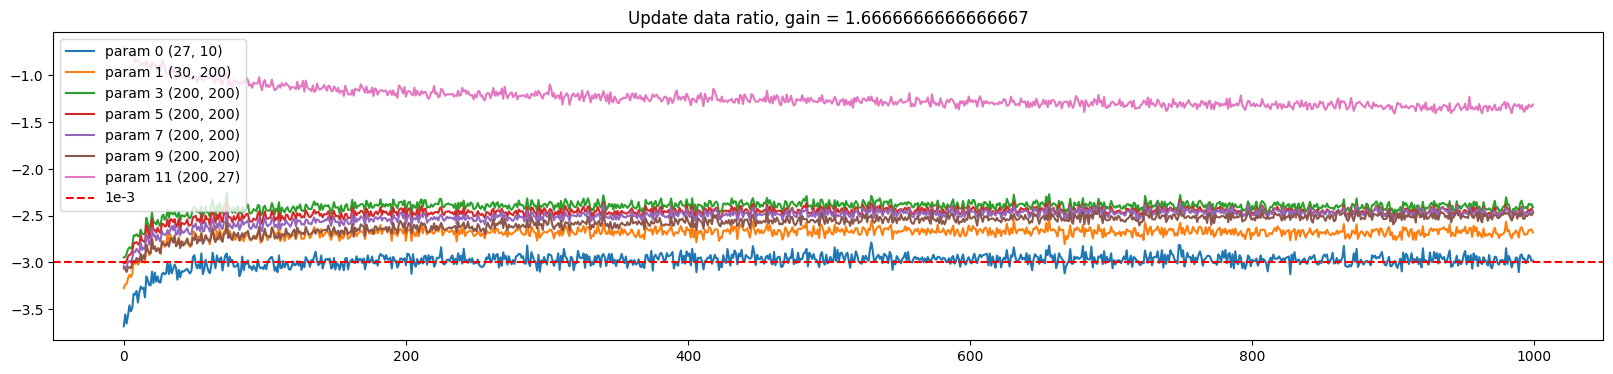

In [1078]:
gain = 5 / 3


g = torch.Generator().manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, n_hidden, generator=g), Tanh(),
    Linear(n_hidden, vocab_size, generator=g)
]

params = C.parameters() + [p for module in layers for p in module.parameters()]

for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain
layers[-1].weight.data *= 0.1 # less confident for probability at initial stage

uds = {i: [] for i, p in enumerate(params) if p.ndim == 2}
n_steps = 1000
lr = 0.1
torch.manual_seed(42)
for step in range(n_steps):
    idx = torch.randint(0, X_train.shape[0], (bs,))
    x, y = X_train[idx], Y_train[idx]


    h = C(x).view(x.shape[0], -1)
    for layer in layers:
        h = layer(h)

    loss = F.cross_entropy(h, y)
    loss.backward()

    # log update
    for i, p in enumerate(params):
        if p.ndim == 2:
            ud = lr * p.grad.std() / p.data.std()
            uds[i].append(ud.log10())

    for p in params:
        p.data -= lr * p.grad
        p.grad = None


plt.figure(figsize=(20, 4))
for i, ud in uds.items():
    plt.plot(ud, label=f'param {i} {tuple(params[i].shape)}')
plt.axhline(-3, color='red', linestyle='--', label='1e-3')
plt.legend()
plt.title(f'Update data ratio, gain = {gain}')
plt.show()




## with batch normalization
no matter what initialization, batch normalization makes forward and backward stable

train loss: 18.397714614868164
[out] layer  2     Tanh:  mean -0.0002, std 0.6439 saturated 1.02%
[out] layer  5     Tanh:  mean 0.0014, std 0.6384 saturated 1.33%
[out] layer  8     Tanh:  mean 0.0016, std 0.6339 saturated 1.16%
[out] layer 11     Tanh:  mean 0.0031, std 0.6371 saturated 1.34%
[out] layer 14     Tanh:  mean 0.0008, std 0.6331 saturated 1.33%


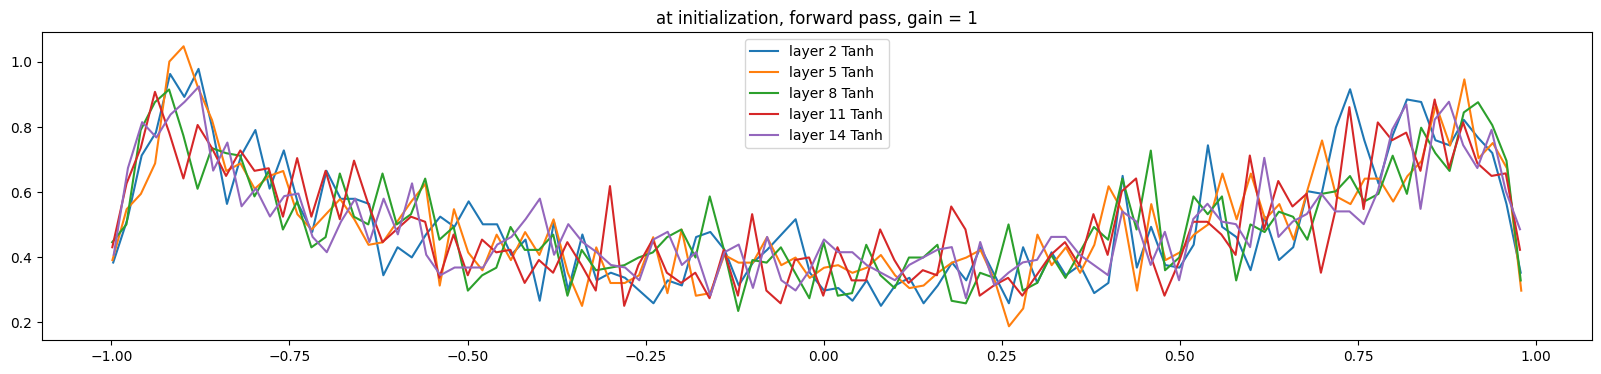

[out.grad] layer  2     Tanh:  mean -0.0000, std 0.074761, maxv 0.4397
[out.grad] layer  5     Tanh:  mean -0.0000, std 0.063222, maxv 0.2763
[out.grad] layer  8     Tanh:  mean -0.0000, std 0.051520, maxv 0.2271
[out.grad] layer 11     Tanh:  mean -0.0000, std 0.044812, maxv 0.1678
[out.grad] layer 14     Tanh:  mean 0.0012, std 0.042002, maxv 0.1747


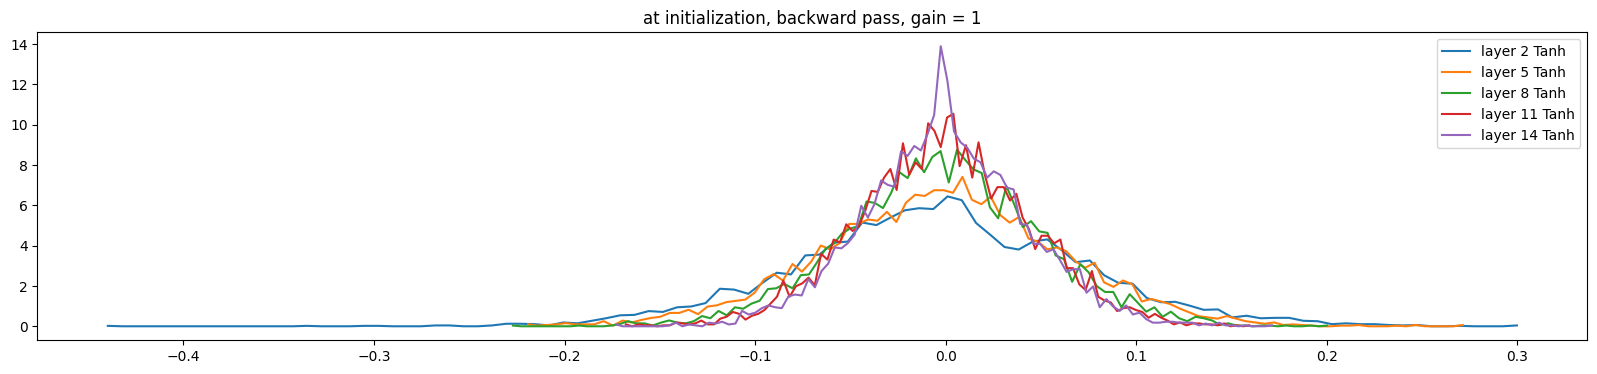

In [1034]:
gain = 1  # no gain

class Linear:
    def __init__(self, in_features, out_features, bias=True, generator=None):
        self.weight = torch.randn(in_features, out_features, requires_grad=True, generator=generator)
        self.bias = torch.zeros(out_features, requires_grad=True) if bias else None
        # initialization
        # self.weight.data /= (self.weight.shape[0]) ** 0.5 # no scaled initialization

    def __call__(self, x):
        out = x @ self.weight
        if self.bias is not None:
            out = out + self.bias
        self.out = out
        return self.out
    
    def parameters(self):
        params = [self.weight]
        if self.bias is not None:
            params.append(self.bias)
        return params

g.manual_seed(42)
C = Embedding(vocab_size, n_embd, generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, bias=False, generator=g), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False, generator=g), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False, generator=g), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False, generator=g), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False, generator=g), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size, generator=g), BatchNorm1d(vocab_size)
]
for module in layers:
    if isinstance(module, Linear):
        module.weight.data *= gain

torch.manual_seed(42)
idx = torch.randint(0, X_train.shape[0], (bs,))
x, y = X_train[idx], Y_train[idx]


h = C(x).view(x.shape[0], -1)
for layer in layers:
    h = layer(h)

loss = F.cross_entropy(h, y)
print(f'train loss: {loss.item()}')
for module in layers:
    module.out.retain_grad() # keep grad for intermediate variables

loss.backward()


plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.detach()
        print(f'[out] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.4f} saturated {(out > 0.97).float().mean().item()*100:.2f}%')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, forward pass, gain = {gain}')
plt.show()
plt.figure(figsize=(20, 4))
for i, layer in enumerate(layers):
    if isinstance(layer, Tanh):
        out = layer.out.grad.view(-1)
        print(f'[out.grad] layer {i:2d} {layer.__class__.__name__:>8s}:  mean {out.mean().item():.4f}, std {out.std().item():.6f}, maxv {out.abs().max().item():.4f}')
        hist, bin_edges = torch.histogram(out, density=True)
        plt.plot(bin_edges[:-1].numpy(), hist.numpy(), label=f'layer {i} {layer.__class__.__name__}')

plt.legend()
plt.title(f'at initialization, backward pass, gain = {gain}')
plt.show()
